In [1]:
import glob

import math
from math import sqrt

from bs4 import BeautifulSoup

import pandas as pd

from pandas.core.frame import DataFrame

import matplotlib.pyplot as plt

In [2]:
labels=glob.glob('/Users/mac/Downloads/dataset/train/labels/*.xml')
# *是正则表达式, 表示匹配0个或多个的表达式 这里表示的是全部的xml文件。只要满足前面的条件都是匹配的。glob 是抓取路径文件

In [3]:
gt_label=["Airplane","Ship","Vehicle","Basketball Court","Tennis Court","Football field","Baseball field","Intersection","Roundabout","Bridge"]
list_nummers = []

In [4]:
def read(label):
    xmlfile=open(label,'r')
    xml = xmlfile.read()
    soup = BeautifulSoup(xml, "xml")
    return soup

In [5]:
def extract(point):
    p = point.string
    x = float(p.split(',')[0])
    y = float(p.split(',')[1])
    return (x,y)

In [6]:
def calculate(p_coordinate):
    width = sqrt(math.pow(p_coordinate[0][0]-p_coordinate[1][0],2)+(math.pow(p_coordinate[0][1]-p_coordinate[1][1],2)))
    length = sqrt(math.pow(p_coordinate[1][0]-p_coordinate[2][0],2)+(math.pow(p_coordinate[1][1]-p_coordinate[2][1],2)))
    size = width * length
    if length>=width:
        Aspect_ratio = length / width
    else:
        Aspect_ratio = width / length
    return size,Aspect_ratio

In [7]:
Acreage = []
Ratio = []
Name = []
for label in labels:
    soup = read(label)
    list_catagory = []
    list_nummer = []
    # soup 就是xml文件中的全部信息
    object_list = soup.annotation.objects.find_all('object')
    for object in object_list:
        points = object.points.find_all('point')
        p_coordinate = []
        for point in points[:3]:
            # print(point.string)
            p_coordinate.append(extract(point))
        size,Aspect_ratio= calculate(p_coordinate)
        Acreage.append(size)
        Ratio.append(Aspect_ratio)
        Name.append(object.possibleresult.find('name').string)
        # 把name 变成字符串
        list_catagory.append(object.possibleresult.find('name').string)
    list_catagory.count(object.possibleresult.find('name').string)
    for gt in gt_label:
        list_nummer.append(list_catagory.count(gt))
    list_nummers.append(list_nummer)

In [11]:
a=[]
b=[]
c=[]
for i in gt_label:
    Class_Name=[] # temp_统计全部类别数量
    Class_Acreage=[] # temp_统计全部面积
    Class_Ratio=[] # temp_统计全部长宽比
    for j in range(len(Name)):
        if Name[j] == i:
            Class_Name.append(Name[j])
            Class_Acreage.append(Acreage[j])
            Class_Ratio.append(Ratio[j])
    a.append(Class_Name)
    b.append(Class_Acreage)
    c.append(Class_Ratio)

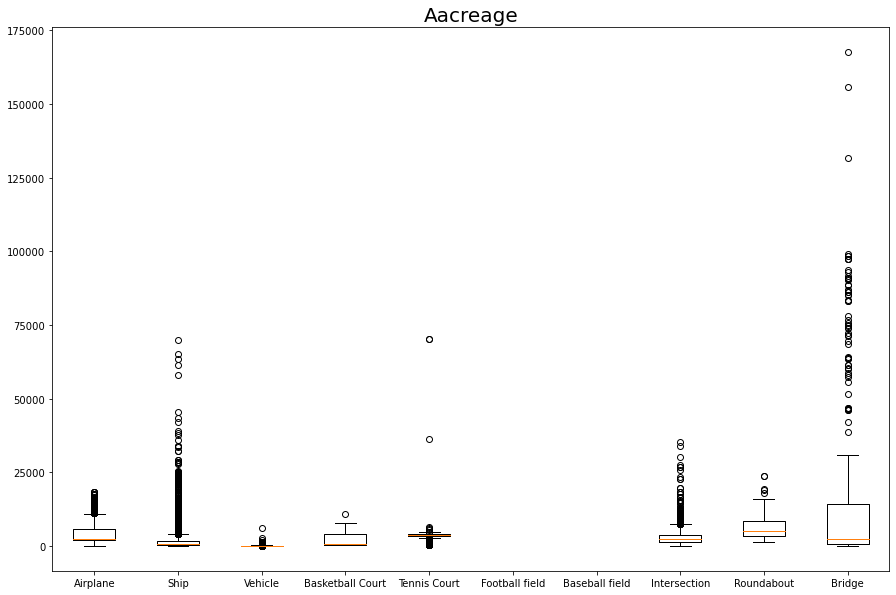

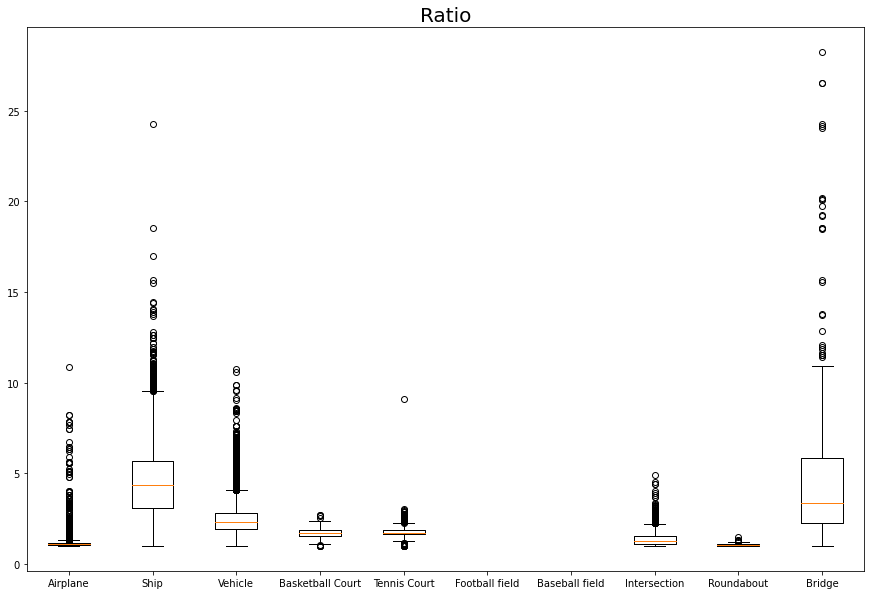

In [12]:
plt.figure(figsize=(15,10))#设置画布的尺寸
plt.title('Aacreage',fontsize=20)#标题，并设定字号大小
MyClass = 'Airplane','Ship','Vehicle','Basketball Court','Tennis Court','Football field','Baseball field','Intersection','Roundabout','Bridge'
plt.boxplot(b,labels = MyClass)#grid=False：代表不显示背景中的网格线
# data.boxplot()#画箱型图的另一种方法，参数较少，而且只接受dataframe，不常用
plt.show()#显示图像

plt.figure(figsize=(15,10))#设置画布的尺寸
plt.title('Ratio',fontsize=20)#标题，并设定字号大小
MyClass = 'Airplane','Ship','Vehicle','Basketball Court','Tennis Court','Football field','Baseball field','Intersection','Roundabout','Bridge'
plt.boxplot(c,labels = MyClass)#grid=False：代表不显示背景中的网格线
# data.boxplot()#画箱型图的另一种方法，参数较少，而且只接受dataframe，不常用
plt.show()#显示图像


In [18]:
import numpy as np

In [19]:
for label in labels:
    soup = read(label)
    result = []
    list_catagory = []
    list_nummer = []
    # soup 就是xml文件中的全部信息
    object_list = soup.annotation.objects.find_all('object')
    for object in object_list:
        points = object.points.find_all('point')
        p_coordinate = []
        for point in points[:3]:
            # print(point.string)
            p_coordinate.append(extract(point))
        size,Aspect_ratio= calculate(p_coordinate)
        # 把name 变成字符串
        list_catagory.append(object.possibleresult.find('name').string)
    list_catagory.count(object.possibleresult.find('name').string)
    for gt in gt_label:
        list_nummer.append(list_catagory.count(gt))
    list_nummers.append(list_nummer)
#     print(list_nummers)
tmp = np.array(list_nummers)
print(tmp.sum(axis=0))

[ 21392  14094 132078    788   1462      0      0   2978    262    588]


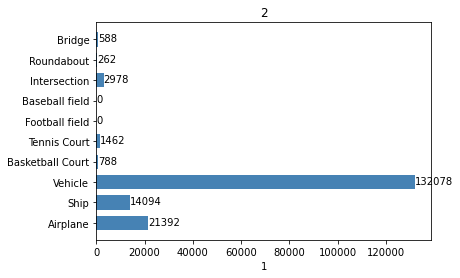

In [21]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

price = [21392, 14094, 132078, 788, 1462, 0, 0, 2978, 262, 588]
"""
绘制水平条形图方法barh
参数一：y轴
参数二：x轴
"""
plt.barh(range(10), price, height=0.7, color='steelblue', alpha=1)      # 从下往上画
plt.yticks(range(10), ['Airplane', 'Ship', 'Vehicle', 'Basketball Court', 'Tennis Court', 'Football field', 'Baseball field', 'Intersection', 'Roundabout', 'Bridge'])
plt.xlabel("1")
plt.title("2")
for x, y in enumerate(price):
    plt.text(y + 0.2, x - 0.1, '%s' % y)
plt.savefig("./hu.png")